<a href="https://colab.research.google.com/github/hargurjeet/DeepLearning/blob/main/Fake_News_Classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


 12%|█▏        | 5.00M/41.0M [00:00<00:00, 42.9MB/s]

100%|██████████| 41.0M/41.0M [00:00<00:00, 114MB/s] 


In [ ]:
real_news = pd.read_csv('/content/fake-and-real-news-dataset/True.csv')
fake_news = pd.read_csv('/content/fake-and-real-news-dataset/Fake.csv')
real_news.head(5)

In [ ]:
fake_news.head(5)

In [13]:
print(real_news.shape)
print(fake_news.shape)

(21417, 5)
(23481, 5)


In [9]:
real_news['FakeOrNot'] = 1
fake_news['FakeOrNot'] = 0

In [11]:
News_Dataset = pd.concat([real_news, fake_news], ignore_index=True)
News_Dataset.head()

,title,text,subject,date,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [14]:
News_Dataset.shape

(44898, 5)

In [15]:
News_Dataset.columns

Index(['title', 'text', 'subject', 'date', 'FakeOrNot'], dtype='object')

In [16]:
News_Dataset_Filtered = News_Dataset.drop(['text', 'subject', 'date'], axis = 1)
News_Dataset_Filtered

,title,FakeOrNot
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
44896,How to Blow $700 Million: Al Jazeera America F...,0


In [17]:
News_Dataset_Filtered.FakeOrNot.value_counts()

0    23481
1    21417
Name: FakeOrNot, dtype: int64

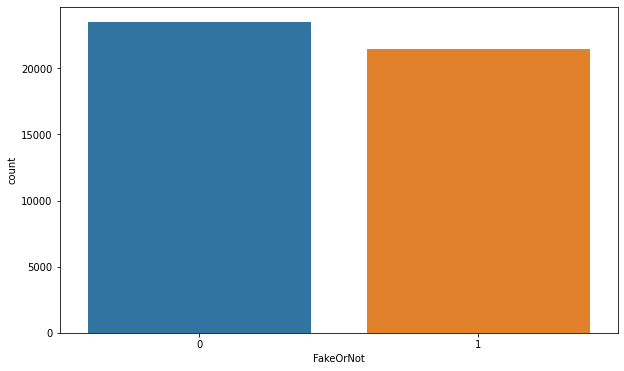

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(data = News_Dataset_Filtered, x='FakeOrNot')
plt.show()

In [19]:
News_Dataset_Filtered[News_Dataset_Filtered.isnull().any(axis=1)]

,title,FakeOrNot


In [ ]:
 dummy = News_Dataset_Filtered.title.replace("[^a-zA-Z]"," ",regex=True)


In [35]:
 pd.set_option('display.max_colwidth', None)
 dummy1 = dummy.str.lower()

In [36]:
dummy1[:10]

0                as u s  budget fight looms  republicans flip their fiscal script
1                u s  military to accept transgender recruits on monday  pentagon
2                    senior u s  republican senator   let mr  mueller do his job 
3                     fbi russia probe helped by australian diplomat tip off  nyt
4           trump wants postal service to charge  much more  for amazon shipments
5                white house  congress prepare for talks on spending  immigration
6                 trump says russia probe will be fair  but timeline unclear  nyt
7                    factbox  trump on twitter  dec       approval rating  amazon
8                                      trump on twitter  dec       global warming
9    alabama official to certify senator elect jones today despite challenge  cnn
Name: title, dtype: object

In [33]:
News_Dataset_Filtered.title[:10]

0                As U.S. budget fight looms, Republicans flip their fiscal script
1                U.S. military to accept transgender recruits on Monday: Pentagon
2                    Senior U.S. Republican senator: 'Let Mr. Mueller do his job'
3                     FBI Russia probe helped by Australian diplomat tip-off: NYT
4           Trump wants Postal Service to charge 'much more' for Amazon shipments
5                White House, Congress prepare for talks on spending, immigration
6                 Trump says Russia probe will be fair, but timeline unclear: NYT
7                    Factbox: Trump on Twitter (Dec 29) - Approval rating, Amazon
8                                      Trump on Twitter (Dec 28) - Global Warming
9    Alabama official to certify Senator-elect Jones today despite challenge: CNN
Name: title, dtype: object